In [1]:

!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yumiyui","key":"7ce9353faa4d732da1633f8fe4acf7da"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets download -d balatmak/newsgroup20bbcnews

 79% 12.0M/15.1M [00:00<00:00, 20.0MB/s]
100% 15.1M/15.1M [00:01<00:00, 15.7MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/newsgroup20bbcnews.zip', 'r')
zip_ref.extractall('/content/sets')
zip_ref.close()

In [20]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/sets/bbc-text.csv')
df.head(10)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


In [21]:
# melihat colom
df.columns

Index(['category', 'text'], dtype='object')

In [22]:
# Total Datasets
df.shape

(2225, 2)

In [23]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [27]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [39]:
df['text'][10]

'berlin cheers for anti-nazi film a german movie about an anti-nazi resistance heroine has drawn loud applause at berlin film festival.  sophie scholl - the final days portrays the final days of the member of the white rose movement. scholl  21  was arrested and beheaded with her brother  hans  in 1943 for distributing leaflets condemning the  abhorrent tyranny  of adolf hitler. director marc rothemund said:  i have a feeling of responsibility to keep the legacy of the scholls going.   we must somehow keep their ideas alive   he added.  the film drew on transcripts of gestapo interrogations and scholl s trial preserved in the archive of communist east germany s secret police. their discovery was the inspiration behind the film for rothemund  who worked closely with surviving relatives  including one of scholl s sisters  to ensure historical accuracy on the film. scholl and other members of the white rose resistance group first started distributing anti-nazi leaflets in the summer of 19

<Axes: xlabel='category', ylabel='count'>

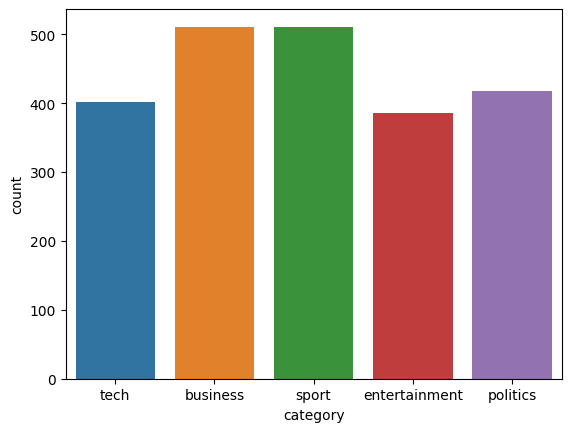

In [32]:

import seaborn as sns
sns.countplot(data=df,x='category')

In [61]:
# Import Module
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))

import tensorflow as tf
from keras.layers import Input, LSTM, Bidirectional, SpatialDropout1D, Dropout, Flatten, Dense, Embedding, BatchNormalization
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

In [40]:
space = re.compile('[/(){}\[\]\|@,;]')
symbols= re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # mengubah kata menjadi kecil
    text = space.sub(' ', text) # mengganti simbol dengan spasi
    text = symbols.sub('', text) # menghapus simbol dengan teks
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # menghapus stopwors dari teks
    return text


df['text']=df['text'].apply(clean_text)

In [41]:
df['text'][10]

'berlin cheers antinazi film german movie antinazi resistance heroine drawn loud applause berlin film festival sophie scholl final days portrays final days member white rose movement scholl 21 arrested beheaded brother hans 1943 distributing leaflets condemning abhorrent tyranny adolf hitler director marc rothemund said feeling responsibility keep legacy scholls going must somehow keep ideas alive added film drew transcripts gestapo interrogations scholl trial preserved archive communist east germany secret police discovery inspiration behind film rothemund worked closely surviving relatives including one scholl sisters ensure historical accuracy film scholl members white rose resistance group first started distributing antinazi leaflets summer 1942 arrested dropped leaflets munich university calling day reckoning adolf hitler regime film focuses si days scholl arrest intense trial saw scholl initially deny charges ended defiant appearance one three german films vying top prize festiva

In [44]:
g=[]

for i in df['text']:
    g.append(i)


len(g)

2225

In [45]:
len(g[4])

1207

In [47]:
maxl = max([len(s) for s in g])
print ('Panjang teks :', maxl)

Panjang teks : 16201


In [62]:
category = pd.get_dummies(df.category)
df_cat = pd.concat([df, category], axis=1)
df_cat = df_cat.drop(columns='category')
df_cat.head(10)

,text,business,entertainment,politics,sport,tech
0,tv future hands viewers home theatre systems p...,0,0,0,0,1
1,worldcom boss left books alone former worldcom...,1,0,0,0,0
2,tigers wary farrell gamble leicester say rushe...,0,0,0,1,0
3,yeading face newcastle fa cup premiership side...,0,0,0,1,0
4,ocean twelve raids bo office ocean twelve crim...,0,1,0,0,0
5,howard hits back mongrel jibe michael howard s...,0,0,1,0,0
6,blair prepares name poll date tony blair likel...,0,0,1,0,0
7,henman hopes ended dubai third seed tim henman...,0,0,0,1,0
8,wilkinson fit face edinburgh england captain j...,0,0,0,1,0
9,last star wars children sith final star wars m...,0,1,0,0,0


In [63]:
news = df_cat['text'].values
label = df_cat[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [64]:
news

array(['tv future hands viewers home theatre systems plasma highdefinition tvs digital video recorders moving living room way people watch tv radically different five years time according epert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes us leading trend programmes content delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices one talkedabout technologies ces digital personal video recorders dvr pvr settop boes like us tivo uk sky+ system allow people record store play pause forward wind tv programmes want essentially technology allows much personalised tv also builtin highdefinition tv sets big business japan us slower take europe lack highdefinition programming people forward wind adverts also forget abiding network channel schedules putting together alacarte entertainment us networks cable satellite companies worried means terms advertising re

In [65]:
label

array([[0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [66]:
# membagi data training dan validation dengan train test split

news_train, news_test, label_train, label_test = train_test_split(news, label, test_size=0.2, shuffle=True)

In [74]:
print(news_train.shape)
print(news_test.shape)
print(label_train.shape)
print(label_test.shape)

(1780,)
(445,)
(1780, 5)
(445, 5)


In [67]:
# Tokenizer

tokenizer = Tokenizer(num_words=5000, oov_token='x', filters='!"#$%&()*+,-./:;<=>@[\]^_`{|}~ ')
tokenizer.fit_on_texts(news_train)
tokenizer.fit_on_texts(news_test)

sekuens_train = tokenizer.texts_to_sequences(news_train)
sekuens_test = tokenizer.texts_to_sequences(news_test)

padded_train = pad_sequences(sekuens_train)
padded_test = pad_sequences(sekuens_test)

In [73]:
print(f"Total data Pengujian: {padded_train.shape[0]}")
print(f"Total data Pelatihan: {padded_test.shape[0]}")

Total data Pengujian: 1780
Total data Pelatihan: 445


In [68]:
# model Sequential
vocab_size = 5000

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim= vocab_size, output_dim=64),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy',)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          320000    
                                                                 
 lstm_1 (LSTM)               (None, 128)               98816     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 645       
                                                                 
Total params: 435973 (1.66 MB)
Trainable params: 435973 (1.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
# Menerapkan callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 90%!")
callbacks = myCallback()

In [70]:
history = model.fit(padded_train,
                    label_train,
                    epochs=50,
                     validation_data=(padded_test, label_test),
                     verbose=2,
                     callbacks=[callbacks],
                     validation_steps=30)

Epoch 1/50
56/56 - 236s - loss: 1.6086 - accuracy: 0.2612 - val_loss: 1.5602 - val_accuracy: 0.4315 - 236s/epoch - 4s/step
Epoch 2/50
56/56 - 221s - loss: 1.2275 - accuracy: 0.4938 - val_loss: 0.8458 - val_accuracy: 0.6764 - 221s/epoch - 4s/step
Epoch 3/50
56/56 - 223s - loss: 0.5067 - accuracy: 0.8360 - val_loss: 0.5038 - val_accuracy: 0.8202 - 223s/epoch - 4s/step
Epoch 4/50
56/56 - 222s - loss: 0.1633 - accuracy: 0.9539 - val_loss: 0.5382 - val_accuracy: 0.8674 - 222s/epoch - 4s/step
Epoch 5/50
56/56 - 222s - loss: 0.1184 - accuracy: 0.9708 - val_loss: 0.3549 - val_accuracy: 0.8966 - 222s/epoch - 4s/step
Epoch 6/50
56/56 - 232s - loss: 0.0285 - accuracy: 0.9961 - val_loss: 0.4184 - val_accuracy: 0.8966 - 232s/epoch - 4s/step
Epoch 7/50

The accuracy of the training set and the validation set has reached > 90%!
56/56 - 221s - loss: 0.0154 - accuracy: 0.9978 - val_loss: 0.2553 - val_accuracy: 0.9326 - 221s/epoch - 4s/step


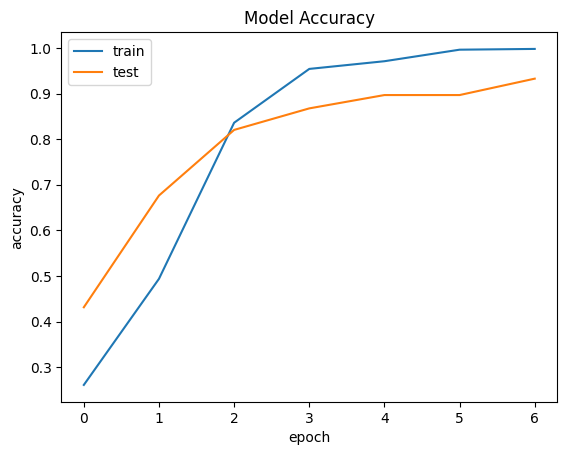

In [71]:
# plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


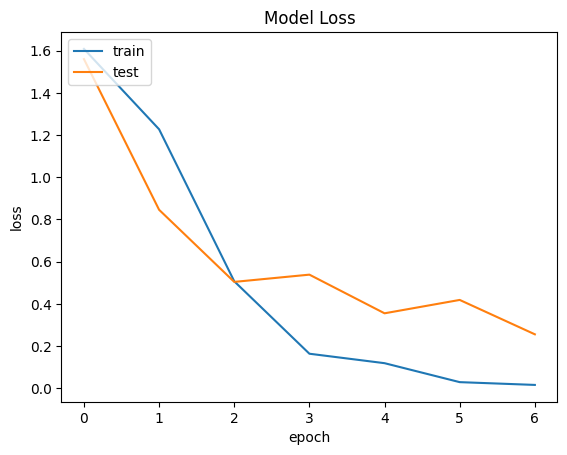

In [72]:
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()